# Bibliotecas

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importação dos Csvs e tratamento dos Dados

In [36]:
df_2016 = pd.read_csv('/content/finbraRREO_2016.csv')
df_2017 = pd.read_csv('/content/finbraRREO_2017.csv')
df_2018 = pd.read_csv('/content/finbraRREO_2018.csv')
df_2019 = pd.read_csv('/content/finbraRREO_2019.csv')
df_2020 = pd.read_csv('/content/finbraRREO_2020.csv')
df_2021 = pd.read_csv('/content/finbraRREO_2021.csv')
df_2022 = pd.read_csv('/content/finbraRREO_2022.csv')
df_2023 = pd.read_csv('/content/finbraRREO_2023.csv')

df_2023

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor
0,Prefeitura Municipal de Salvador - BA,2927408,BA,2900319,<MR-11>,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"748076602,2"
1,Prefeitura Municipal de Salvador - BA,2927408,BA,2900319,<MR-11>,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"260095848,3"
2,Prefeitura Municipal de Salvador - BA,2927408,BA,2900319,<MR-11>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"63158513,88"
3,Prefeitura Municipal de Salvador - BA,2927408,BA,2900319,<MR-11>,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"118868688,6"
4,Prefeitura Municipal de Salvador - BA,2927408,BA,2900319,<MR-11>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"18068577,33"
...,...,...,...,...,...,...,...,...
10741,Prefeitura Municipal de Cuiabá - MT,5103403,MT,623614,PREVISÃO ATUALIZADA 2023,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,3798349491
10742,Prefeitura Municipal de Cuiabá - MT,5103403,MT,623614,PREVISÃO ATUALIZADA 2023,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,58700000
10743,Prefeitura Municipal de Cuiabá - MT,5103403,MT,623614,PREVISÃO ATUALIZADA 2023,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,3739649491
10744,Prefeitura Municipal de Cuiabá - MT,5103403,MT,623614,PREVISÃO ATUALIZADA 2023,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,12387000


## Adição dos anos de cada Dado

In [37]:
import os

dfs = []
# Itera sobre todos os arquivos na pasta
for arquivo in os.listdir("/content/"):
    if arquivo.endswith(".csv"):
        ano = int(arquivo.split('_')[-1].split('.')[0])

        df = pd.read_csv(os.path.join("/content/", arquivo))

        df['Ano'] = ano

        dfs.append(df)

# Concatenar todos os DataFrames em um só
df_f = pd.concat(dfs, ignore_index=True)

# Ver o DataFrame final
df_f

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor,Ano
0,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"480992882,7",2016
1,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,Receita Tributária,siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"96814827,57",2016
2,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"18713387,39",2016
3,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"53139640,11",2016
4,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"8344412,48",2016
...,...,...,...,...,...,...,...,...,...
77855,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,Rendimentos de Aplicações de Recursos Previden...,siconfi-cor_RendimentosDeAplicacoesDeRecursosP...,44000000,2022
77856,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,273022000,2022
77857,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,3530495701,2022
77858,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,3530495701,2022


## Transformação dos Valores em Valores inteiros

In [38]:
df_f['Valor'] = df_f['Valor'].replace({'\$': '', ',': ''}, regex=True)  # Remove símbolos de dólar e vírgulas
df_f['Valor'] = df_f['Valor'].str.strip()  # Remove espaços em branco

df_f['Valor'] = pd.to_numeric(df_f['Valor'], errors='coerce')

df_f

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor,Ano
0,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,4809928827,2016
1,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,Receita Tributária,siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,9681482757,2016
2,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,1871338739,2016
3,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,5313964011,2016
4,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2591188,<MR-11>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,834441248,2016
...,...,...,...,...,...,...,...,...,...
77855,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,Rendimentos de Aplicações de Recursos Previden...,siconfi-cor_RendimentosDeAplicacoesDeRecursosP...,44000000,2022
77856,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,273022000,2022
77857,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,3530495701,2022
77858,Prefeitura Municipal de Teresina - PI,2211001,PI,871126,PREVISÃO ATUALIZADA 2022,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,3530495701,2022


## Filtração dos Dados dos Impostos e Cidades

In [39]:
df_filtrado = df_f[df_f['Conta'].isin(['IPTU', 'ISS', 'ITBI', 'Cota-Parte do ICMS', 'Cota-Parte do IPVA'])]

cidades = ['Prefeitura Municipal de Recife - PE', 'Prefeitura Municipal de Salvador - BA', 'Prefeitura Municipal de Maceió - AL', 'Prefeitura Municipal do Rio de Janeiro - RJ', 'Prefeitura Municipal de João Pessoa - PB']
df_filtrado_cidades = df_filtrado[df_filtrado['Instituição'].isin(cidades)]

df_final = df_filtrado_cidades[['Valor', 'Conta', 'Instituição', 'Ano']]

df_final

,Valor,Conta,Instituição,Ano
1362,142955069,IPTU,Prefeitura Municipal de João Pessoa - PB,2016
1363,151018378,ISS,Prefeitura Municipal de João Pessoa - PB,2016
1364,527022552,ITBI,Prefeitura Municipal de João Pessoa - PB,2016
1371,2772974967,Cota-Parte do ICMS,Prefeitura Municipal de João Pessoa - PB,2016
1372,294404451,Cota-Parte do IPVA,Prefeitura Municipal de João Pessoa - PB,2016
...,...,...,...,...
76662,548134000,IPTU,Prefeitura Municipal de Recife - PE,2022
76663,1162786000,ISS,Prefeitura Municipal de Recife - PE,2022
76664,123740000,ITBI,Prefeitura Municipal de Recife - PE,2022
76674,1011482000,Cota-Parte do ICMS,Prefeitura Municipal de Recife - PE,2022


## Pivotação do Dataset

In [40]:
# Pivotar a tabela para ter os impostos como colunas
df_pivot = df_final.pivot_table(index=['Instituição', 'Ano'], columns='Conta', values='Valor', aggfunc='mean').reset_index()

# Ordenar os dados por Instituição e Ano
df_pivot = df_pivot.sort_values(by=['Instituição', 'Ano'])
df_pivot

Conta,Instituição,Ano,Cota-Parte do ICMS,Cota-Parte do IPVA,IPTU,ISS,ITBI
0,Prefeitura Municipal de João Pessoa - PB,2016,2.361937e+09,7.619348e+08,8.490562e+08,1.436619e+09,1.127809e+09
1,Prefeitura Municipal de João Pessoa - PB,2017,2.125342e+09,1.429306e+09,1.365228e+09,1.173089e+09,1.863127e+09
2,Prefeitura Municipal de João Pessoa - PB,2018,2.647567e+09,6.268471e+08,1.075921e+09,1.880356e+09,1.380357e+09
3,Prefeitura Municipal de João Pessoa - PB,2019,3.033034e+09,1.253772e+09,1.389225e+09,1.923370e+09,8.845998e+08
4,Prefeitura Municipal de João Pessoa - PB,2020,2.490295e+09,1.285578e+09,8.047933e+08,1.821919e+09,1.390502e+09
5,Prefeitura Municipal de João Pessoa - PB,2021,3.239509e+09,8.132257e+08,9.204896e+08,1.993131e+09,8.803288e+08
6,Prefeitura Municipal de João Pessoa - PB,2022,3.096847e+09,9.407695e+08,1.031410e+09,2.306916e+09,1.111826e+09
7,Prefeitura Municipal de João Pessoa - PB,2023,3.449927e+09,1.077319e+09,1.407094e+09,3.414383e+09,1.033233e+09
8,Prefeitura Municipal de Maceió - AL,2016,1.951194e+09,1.198258e+09,7.404460e+08,1.269757e+09,3.156340e+08
9,Prefeitura Municipal de Maceió - AL,2017,1.934253e+09,1.120968e+09,8.524251e+08,1.505749e+09,3.507942e+08


## Percentual da Variação

In [41]:
# Calcular a variação percentual ano a ano para cada imposto
df_pivot['ISS_pct'] = df_pivot.groupby('Instituição')['ISS'].pct_change() * 100
df_pivot['ITBI_pct'] = df_pivot.groupby('Instituição')['ITBI'].pct_change() * 100
df_pivot['IPTU_pct'] = df_pivot.groupby('Instituição')['IPTU'].pct_change() * 100
df_pivot['IPVA_pct'] = df_pivot.groupby('Instituição')['Cota-Parte do IPVA'].pct_change() * 100
df_pivot['ICMS_pct'] = df_pivot.groupby('Instituição')['Cota-Parte do ICMS'].pct_change() * 100

# Remover o primeiro ano, pois não tem referência para percentual
df_pct = df_pivot.dropna(subset=['ISS_pct', 'ITBI_pct', 'IPTU_pct', 'IPVA_pct', 'ICMS_pct'])

# Exibir as primeiras linhas das séries transformadas
df_pct

Conta,Instituição,Ano,Cota-Parte do ICMS,Cota-Parte do IPVA,IPTU,ISS,ITBI,ISS_pct,ITBI_pct,IPTU_pct,IPVA_pct,ICMS_pct
1,Prefeitura Municipal de João Pessoa - PB,2017,2.125342e+09,1.429306e+09,1.365228e+09,1.173089e+09,1.863127e+09,-18.343710,65.198815,60.793590,87.588985,-10.016977
2,Prefeitura Municipal de João Pessoa - PB,2018,2.647567e+09,6.268471e+08,1.075921e+09,1.880356e+09,1.380357e+09,60.290953,-25.911797,-21.191111,-56.143243,24.571330
3,Prefeitura Municipal de João Pessoa - PB,2019,3.033034e+09,1.253772e+09,1.389225e+09,1.923370e+09,8.845998e+08,2.287522,-35.915141,29.119612,100.012344,14.559277
4,Prefeitura Municipal de João Pessoa - PB,2020,2.490295e+09,1.285578e+09,8.047933e+08,1.821919e+09,1.390502e+09,-5.274622,57.189982,-42.068904,2.536828,-17.894247
5,Prefeitura Municipal de João Pessoa - PB,2021,3.239509e+09,8.132257e+08,9.204896e+08,1.993131e+09,8.803288e+08,9.397311,-36.689873,14.375911,-36.742394,30.085343
6,Prefeitura Municipal de João Pessoa - PB,2022,3.096847e+09,9.407695e+08,1.031410e+09,2.306916e+09,1.111826e+09,15.743339,26.296732,12.050193,15.683693,-4.403807
7,Prefeitura Municipal de João Pessoa - PB,2023,3.449927e+09,1.077319e+09,1.407094e+09,3.414383e+09,1.033233e+09,48.006381,-7.068869,36.424271,14.514657,11.401273
9,Prefeitura Municipal de Maceió - AL,2017,1.934253e+09,1.120968e+09,8.524251e+08,1.505749e+09,3.507942e+08,18.585626,11.139565,15.123193,-6.450265,-0.868228
10,Prefeitura Municipal de Maceió - AL,2018,2.180420e+09,1.257346e+09,7.639417e+08,1.496446e+09,5.262059e+08,-0.617803,50.004154,-10.380200,12.166107,12.726717
11,Prefeitura Municipal de Maceió - AL,2019,1.850445e+09,1.380399e+09,1.116176e+09,1.829829e+09,3.181834e+08,22.278298,-39.532523,46.107468,9.786780,-15.133579


## Series Historicas

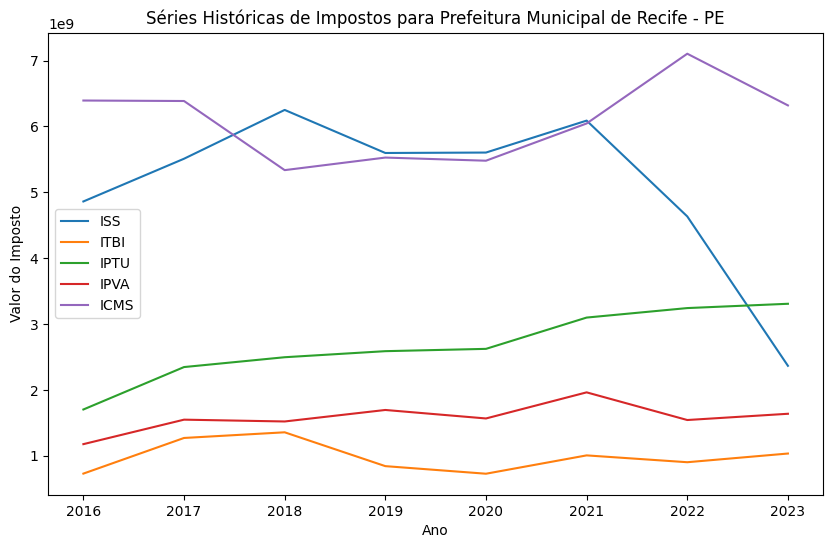

In [42]:
cidade = 'Prefeitura Municipal de Recife - PE'
df_cidade = df_pivot[df_pivot['Instituição'] == cidade]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Ano', y='ISS', data=df_cidade, label='ISS')
sns.lineplot(x='Ano', y='ITBI', data=df_cidade, label='ITBI')
sns.lineplot(x='Ano', y='IPTU', data=df_cidade, label='IPTU')
sns.lineplot(x='Ano', y='Cota-Parte do IPVA', data=df_cidade, label='IPVA')
sns.lineplot(x='Ano', y='Cota-Parte do ICMS', data=df_cidade, label='ICMS')
plt.title(f'Séries Históricas de Impostos para {cidade}')
plt.xlabel('Ano')
plt.ylabel('Valor do Imposto')
plt.legend()
plt.show()

# Regressão e Validação dos Dados

In [43]:
# Função para treinar e validar modelos de regressão
def regressao_e_validacao(df, target, k_values):
    resultados = {}
    X = df[['Ano']]  # Variável independente (Ano)
    y = df[target]  # Variável dependente (ISS_pct, ITBI_pct, IPTU_pct)

    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        modelo = LinearRegression()
        mse = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=kf)
        resultados[k] = np.mean(np.abs(mse))  # Erro médio absoluto
    return resultados

# Exemplo para ISS
k_values = range(2, 7)
resultados_iss = regressao_e_validacao(df_pct[df_pct['Instituição'] == 'Prefeitura Municipal de Recife - PE'], 'ISS_pct', k_values)
print(resultados_iss)


{2: 842.8001488108642, 3: 313.80142129499785, 4: 422.5947260792864, 5: 405.3728485980514, 6: 356.1378459654058}


## Clusterização

In [44]:
# Selecionar as features para a clusterização (percentuais)
features = ['ISS_pct', 'ITBI_pct', 'IPTU_pct', 'IPVA_pct', 'ICMS_pct']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pct[features])

# Clusterização usando AGNES (Hierarchical Clustering)
agnes = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df_pct['Cluster_AGNES'] = agnes.fit_predict(X_scaled)

# Exibir os resultados dos clusters
print(df_pct[['Instituição', 'Cluster_AGNES']].drop_duplicates())

Conta                                  Instituição  Cluster_AGNES
1         Prefeitura Municipal de João Pessoa - PB              0
2         Prefeitura Municipal de João Pessoa - PB              1
4         Prefeitura Municipal de João Pessoa - PB              2
5         Prefeitura Municipal de João Pessoa - PB              3
9              Prefeitura Municipal de Maceió - AL              1
10             Prefeitura Municipal de Maceió - AL              2
14             Prefeitura Municipal de Maceió - AL              0
17             Prefeitura Municipal de Recife - PE              0
18             Prefeitura Municipal de Recife - PE              1
21             Prefeitura Municipal de Recife - PE              2
22             Prefeitura Municipal de Recife - PE              3
25           Prefeitura Municipal de Salvador - BA              1
26           Prefeitura Municipal de Salvador - BA              2
29           Prefeitura Municipal de Salvador - BA              3
33     Pre

<ipython-input-44-fb7092b6053a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct['Cluster_AGNES'] = agnes.fit_predict(X_scaled)


## Redução da Dimensionalidade

In [45]:
# Redução de dimensionalidade com ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clusterização com K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df_pct['Cluster_KMeans'] = kmeans.fit_predict(X_pca)

# Comparar os clusters AGNES e K-Means
print(df_pct[['Instituição', 'Cluster_AGNES', 'Cluster_KMeans']].drop_duplicates())


Conta                                  Instituição  Cluster_AGNES  \
1         Prefeitura Municipal de João Pessoa - PB              0   
2         Prefeitura Municipal de João Pessoa - PB              1   
3         Prefeitura Municipal de João Pessoa - PB              0   
4         Prefeitura Municipal de João Pessoa - PB              2   
5         Prefeitura Municipal de João Pessoa - PB              3   
6         Prefeitura Municipal de João Pessoa - PB              2   
9              Prefeitura Municipal de Maceió - AL              1   
10             Prefeitura Municipal de Maceió - AL              2   
13             Prefeitura Municipal de Maceió - AL              2   
14             Prefeitura Municipal de Maceió - AL              0   
17             Prefeitura Municipal de Recife - PE              0   
18             Prefeitura Municipal de Recife - PE              1   
19             Prefeitura Municipal de Recife - PE              1   
21             Prefeitura Municipa

<ipython-input-45-458fd4a2b418>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct['Cluster_KMeans'] = kmeans.fit_predict(X_pca)


## Exportação para PowerBI

In [46]:
# Exportar o dataframe com os clusters para Excel
df_pct.to_excel('cidades_clusterizadas.xlsx', index=False)

# Exportar os dados percentuais para CSV
df_pct.to_csv('dados_percentuais.csv', index=False)